In [2]:
from torchvision import datasets
from PIL import Image

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage as ski
import cv2

import os

In [ ]:
org_img_path = './.../Herb/Example_Image.jpg'

(-0.5, 3119.5, 3531.5, -0.5)

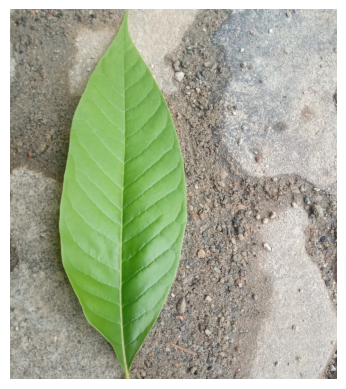

In [5]:
img_org = mpimg.imread(org_img_path)
plt.imshow(img_org)
plt.axis('off')

(-0.5, 3119.5, 3531.5, -0.5)

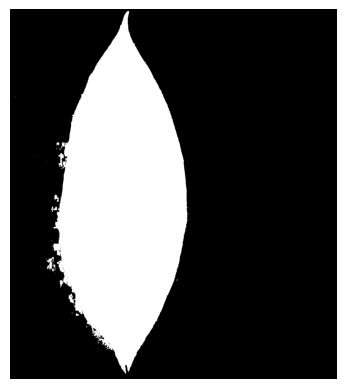

In [6]:
# Convert the image to HSV color space
hsv = cv2.cvtColor(img_org, cv2.COLOR_RGB2HSV)
        
#lower_green = np.array([20, 20, 20])
#upper_green = np.array([120, 255, 255])

# Define range of green color in HSV
lower_green = np.array([35, 40, 50])
upper_green = np.array([85, 255, 255])
        
# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_green, upper_green)
plt.imshow(mask, cmap='gray')
plt.axis('off')

(-0.5, 3119.5, 3531.5, -0.5)

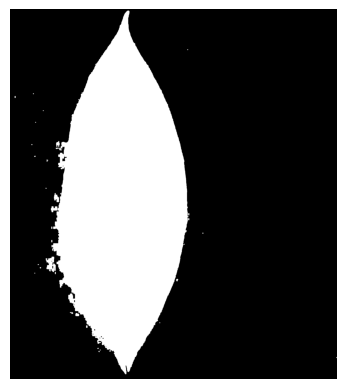

In [7]:
mask_connect = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img_c = cv2.dilate(mask, mask_connect, iterations=2)
plt.imshow(img_c, cmap='gray')
plt.axis('off')

(-0.5, 3119.5, 3531.5, -0.5)

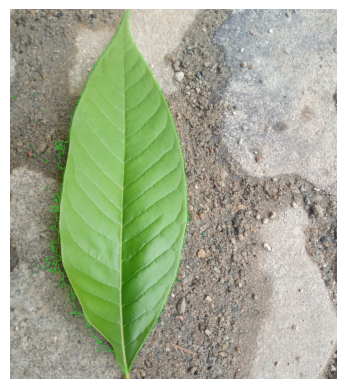

In [8]:
# Get the contours of the image
contours, _ = cv2.findContours(img_c, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_org_copy = np.copy(img_org)
cv2.drawContours(img_org_copy, contours, -1, (0, 255, 0), 2)

# Display the image
plt.imshow(img_org_copy)
plt.axis('off')

(-0.5, 3119.5, 3531.5, -0.5)

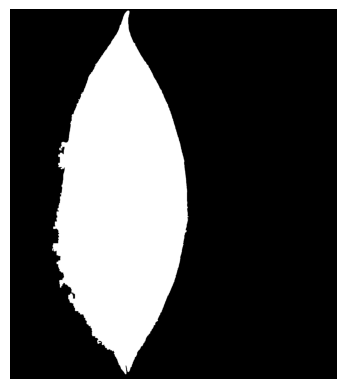

In [9]:
# extract the largest contour and put it on white background
# Sort the contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Extract the largest contour
largest_contour = contours[0]

# Create a mask for the largest contour
mask_con = np.zeros_like(img_org)
cv2.drawContours(mask_con, [largest_contour], -1, (255, 255, 255), -1)

# Display the mask
plt.imshow(mask_con)
plt.axis('off')

(-0.5, 3119.5, 3531.5, -0.5)

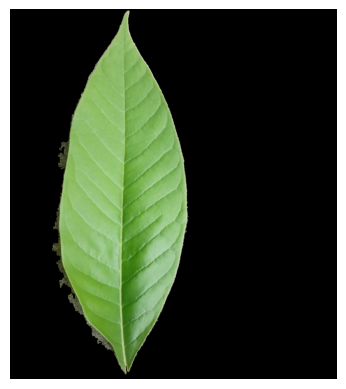

In [10]:
# MASK (Contour)
img_masked = cv2.bitwise_and(img_org, mask_con)
plt.imshow(img_masked)
plt.axis('off')

(-0.5, 3119.5, 3531.5, -0.5)

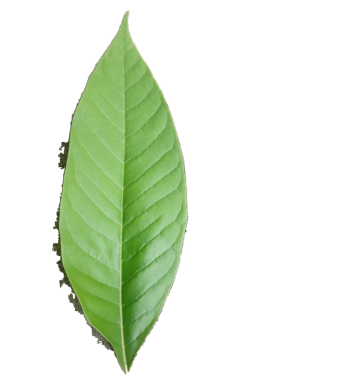

In [11]:
# Create a white background
white_background = np.full_like(img_org, (255, 255, 255))

# Place the leaf on the white background
img_white = np.where(mask_con == 255, img_org, white_background)

# Display the image
plt.imshow(img_white)
plt.axis('off')

(-0.5, 3119.5, 3531.5, -0.5)

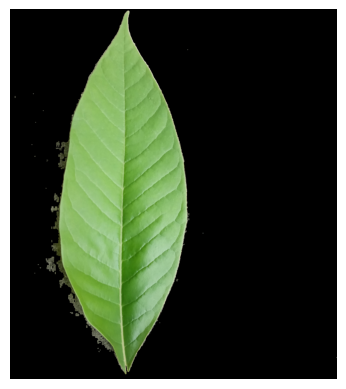

In [12]:
# Apply mask
img_masked = cv2.bitwise_and(img_org, img_org, mask=img_c)
plt.imshow(img_masked)
plt.axis('off')

(-0.5, 3119.5, 3531.5, -0.5)

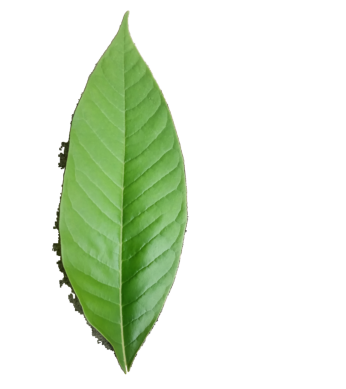

In [16]:
# gamma correction using cv2
img_gamma = ski.exposure.adjust_gamma(img_white, gamma=1.2)
plt.imshow(img_gamma, cmap='gray')
plt.axis('off')

(-0.5, 3119.5, 3531.5, -0.5)

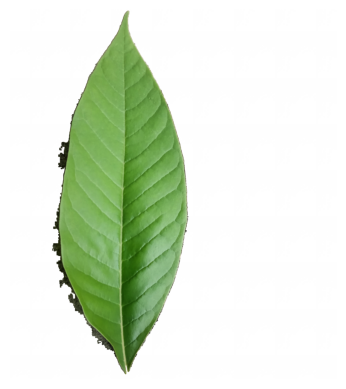

In [20]:
# Adaptive histogram equalization
img_adapteq = ski.exposure.equalize_adapthist(img_gamma, clip_limit=0.001)
plt.imshow(img_adapteq, cmap='gray')
plt.axis('off')